In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

# AirPassengers

In this notebook, I conduct time series analysis of video game sales over time.


In [3]:
def read_csv_files(folder_path, file_names):
    dataframes = {}
    for file_name in file_names:
        # Construir la ruta completa del archivo
        csv_path = os.path.join(folder_path, file_name)
        
        # Verificar si el archivo existe en la ruta especificada
        if os.path.exists(csv_path):
            # Leer el archivo CSV
            df = pd.read_csv(csv_path)            
            # Añadir el DataFrame al diccionario
            dataframes[file_name] = df
            
            # Mostrar las primeras filas del DataFrame para verificar
            print(f"DataFrame de {file_name}:")
            
        else:
            print(f"El archivo {csv_path} no se encuentra en la ruta especificada.")
    
    return dataframes


folder_path = r"C:\Users\Sofia\Documentos\IMPORTANTES\Estudio\ML-Templates\Time_Series"
file_names = ["AirPassengers.csv"]
dataframes = read_csv_files(folder_path, file_names)

df = dataframes["AirPassengers.csv"]

DataFrame de AirPassengers.csv:


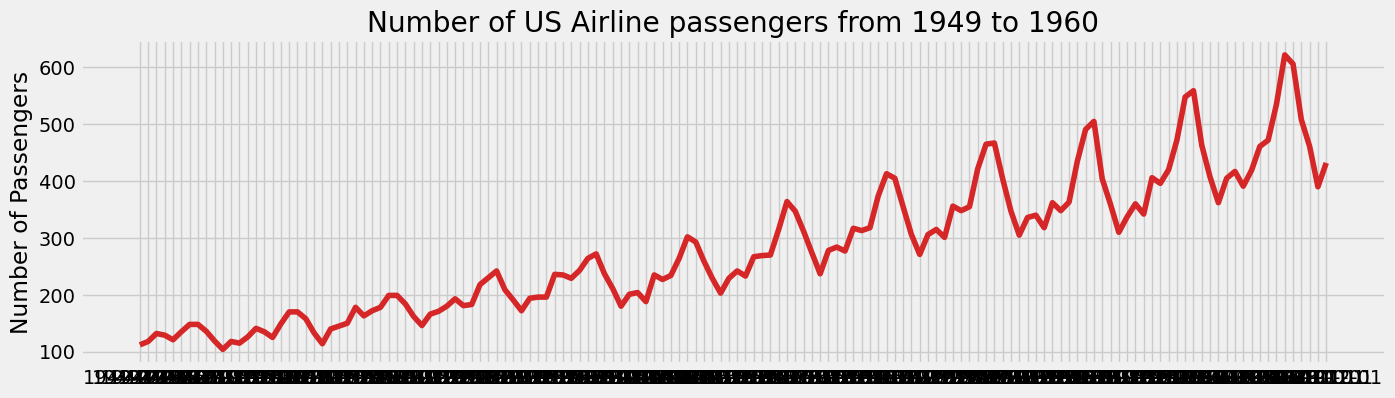

In [10]:
df.columns = ['Date','Number of Passengers']

def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, ylabel=ylabel)
    plt.show()
    

plot_df(df, x=df['Date'], y=df['Number of Passengers'], title='Number of US Airline passengers from 1949 to 1960')

It can be seen that its a monthly time series and follows a certain repetitive pattern every year. So, we can plot each year as a separate line in the same plot. This let us compare the year wise patterns side-by-side.

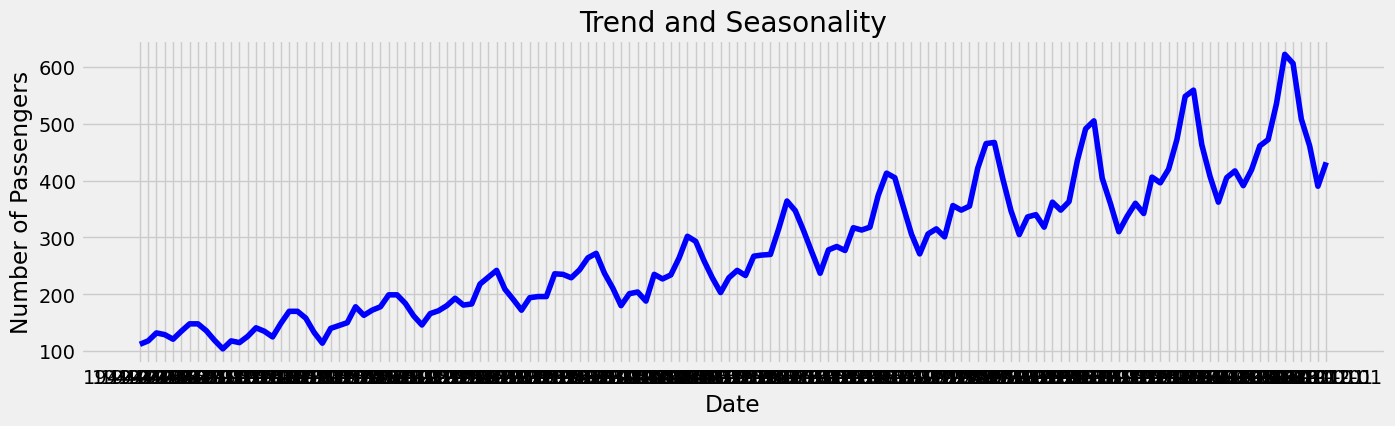

In [11]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df, x=df['Date'], y=df['Number of Passengers'], title='Trend and Seasonality')

Cyclic behaviour¶
Another important thing to consider is the cyclic behaviour. It happens when the rise and fall pattern in the series does not happen in fixed calendar-based intervals. We should not confuse 'cyclic' effect with 'seasonal' effect.

If the patterns are not of fixed calendar based frequencies, then it is cyclic. Because, unlike the seasonality, cyclic effects are typically influenced by the business and other socio-economic factors.

## Decomposition of a Time Series 

### Multiplicative / Additive Decomposition

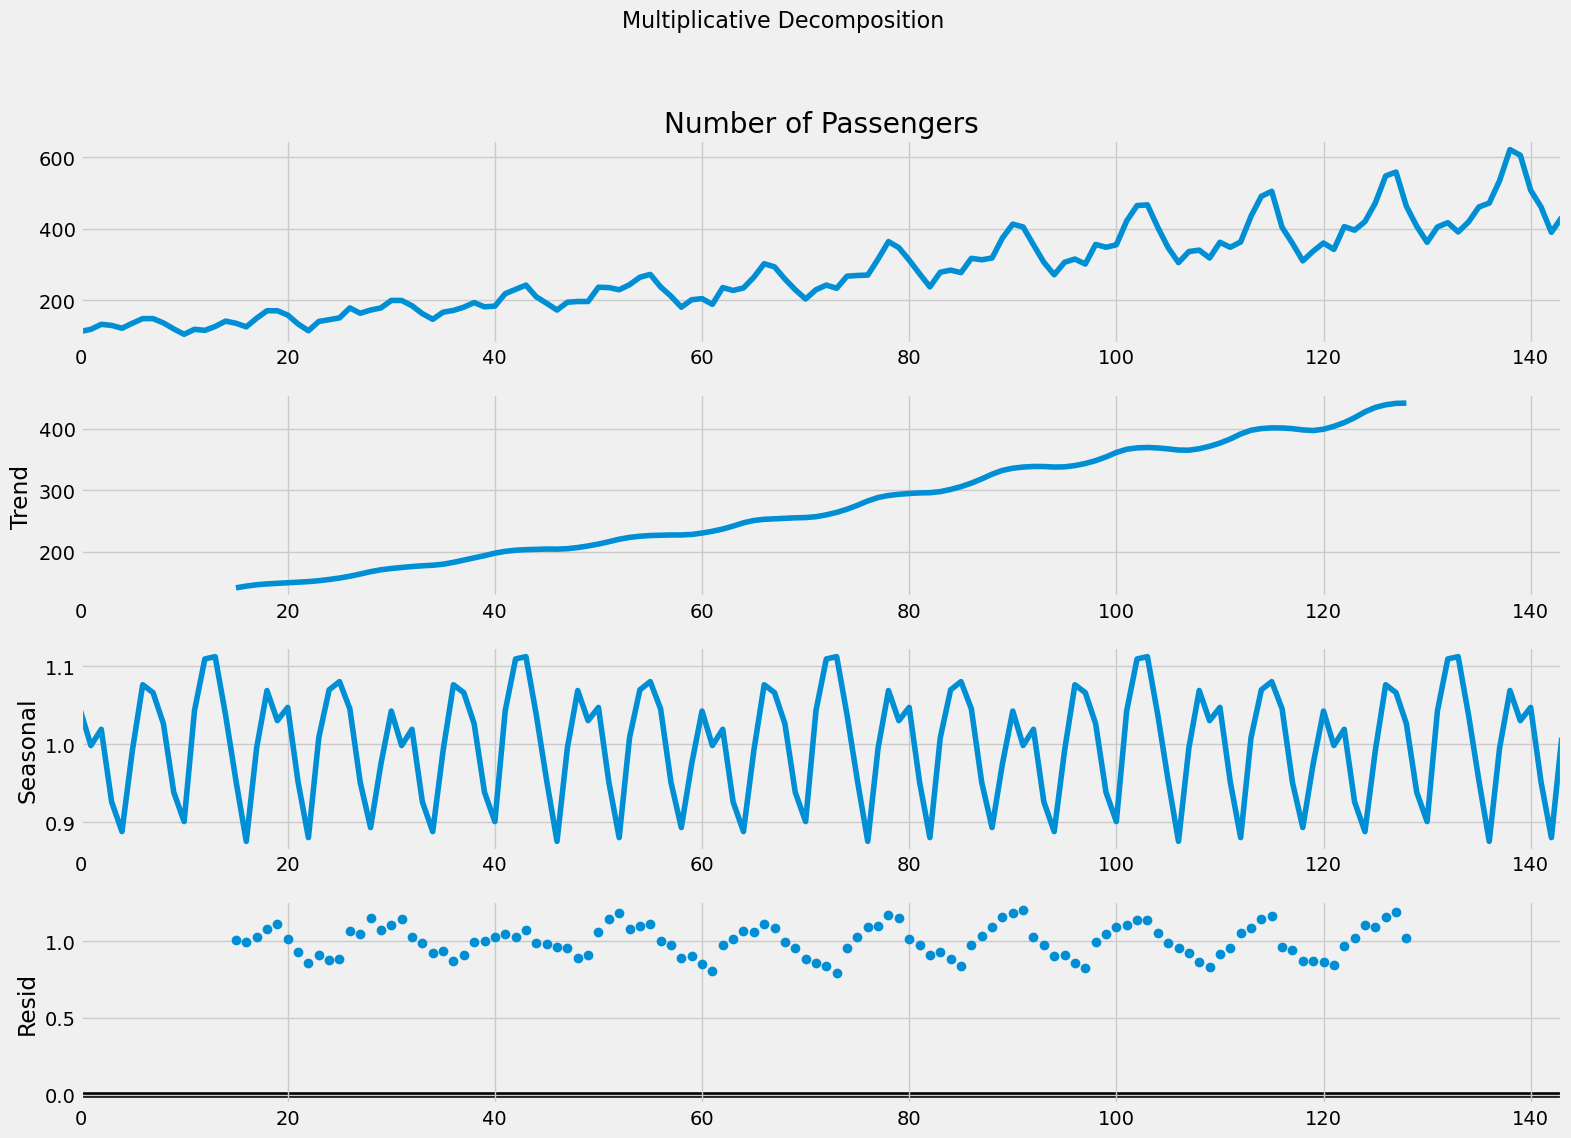

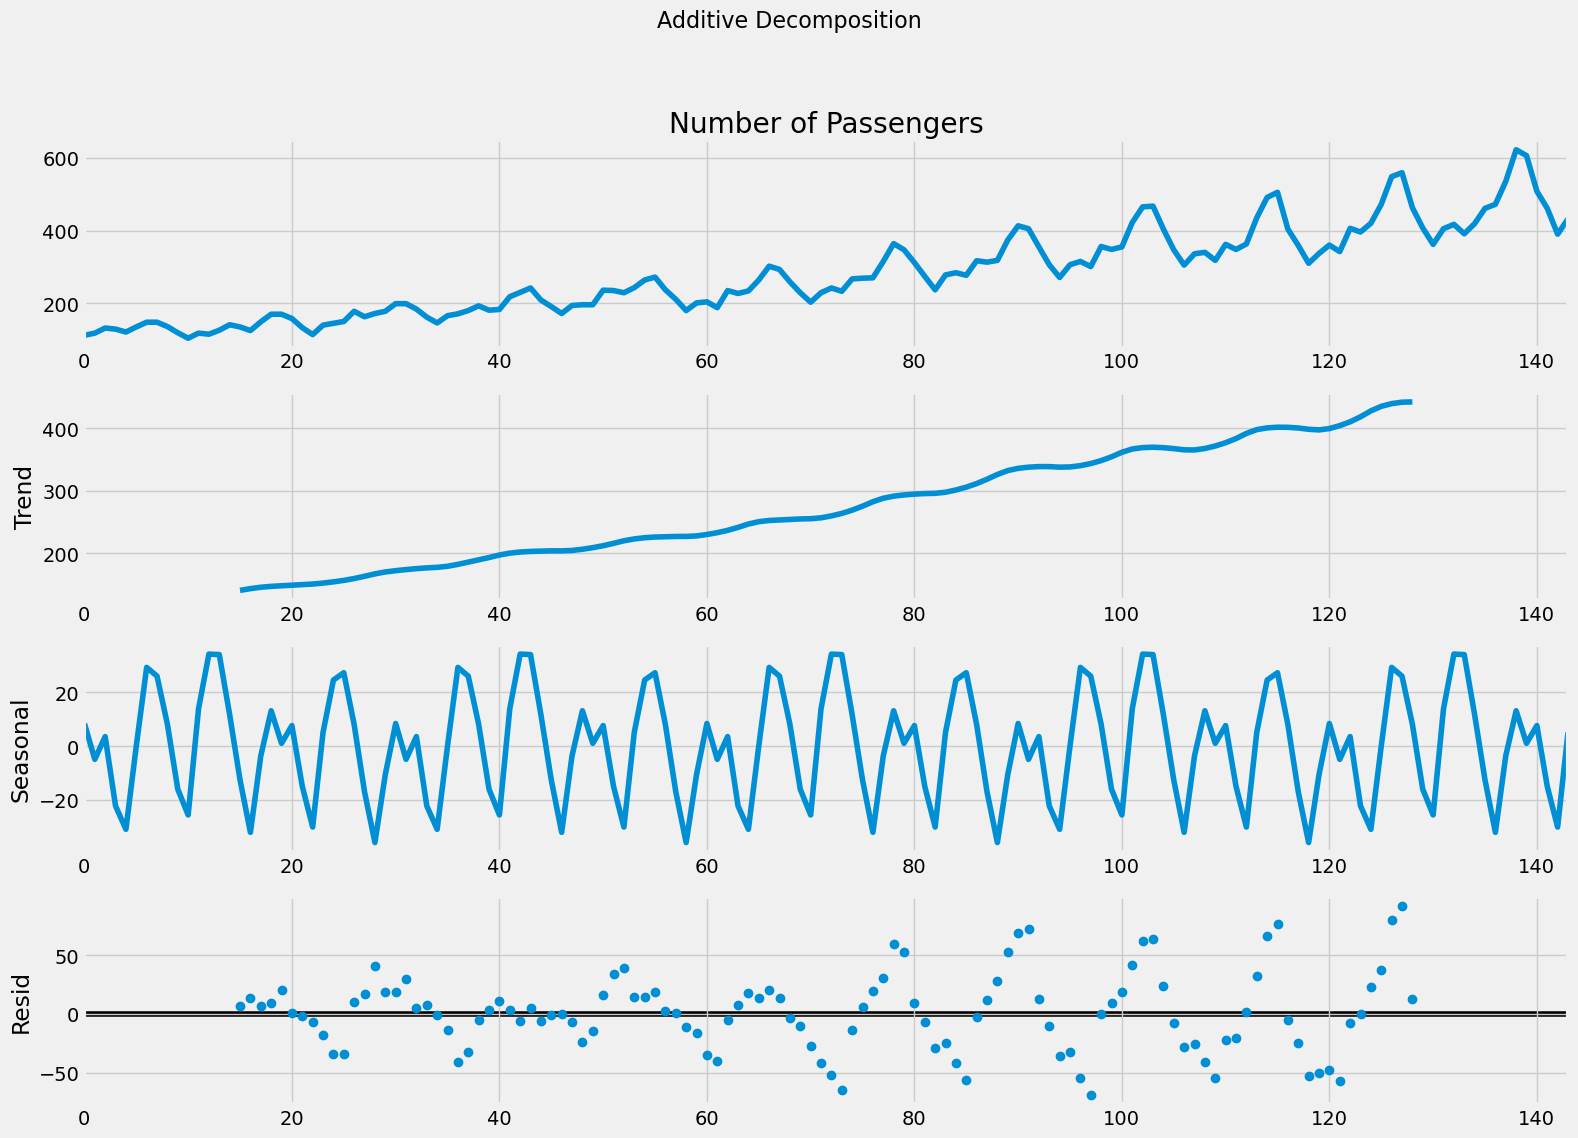

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Number of Passengers'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

If we look at the residuals of the additive decomposition closely, it has some pattern left over.

The multiplicative decomposition, looks quite random which is good. So ideally, multiplicative decomposition should be preferred for this particular series.

### Stationary and Non-Stationary Time Series